In [6]:

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#data
sensor_data = [
    ("S1", "2025-04-28 10:00", 35.2, 12.1, 0.002),
    ("S2", "2025-04-28 10:00", 36.5, 14.0, 0.003),
    ("S1", "2025-04-28 11:00", 36.1, 12.5, 0.0021),
    ("S3", "2025-04-28 10:00", 34.0, 11.8, 0.0025),
    ("S2", "2025-04-28 11:00", 37.2, 14.3, 0.0031),
    ("S1", "2025-04-28 12:00", 37.0, 13.0, 0.0022),
]

#data frame
df=pd.DataFrame(sensor_data , columns=["SensorID", "Timestamp", "Temperature", "Stress", "Displacement"])
print(df)
#convert timastamp tp datetime
df["Timestamp"]=pd.to_datetime(df["Timestamp"])
print(df)

  SensorID         Timestamp  Temperature  Stress  Displacement
0       S1  2025-04-28 10:00         35.2    12.1        0.0020
1       S2  2025-04-28 10:00         36.5    14.0        0.0030
2       S1  2025-04-28 11:00         36.1    12.5        0.0021
3       S3  2025-04-28 10:00         34.0    11.8        0.0025
4       S2  2025-04-28 11:00         37.2    14.3        0.0031
5       S1  2025-04-28 12:00         37.0    13.0        0.0022
  SensorID           Timestamp  Temperature  Stress  Displacement
0       S1 2025-04-28 10:00:00         35.2    12.1        0.0020
1       S2 2025-04-28 10:00:00         36.5    14.0        0.0030
2       S1 2025-04-28 11:00:00         36.1    12.5        0.0021
3       S3 2025-04-28 10:00:00         34.0    11.8        0.0025
4       S2 2025-04-28 11:00:00         37.2    14.3        0.0031
5       S1 2025-04-28 12:00:00         37.0    13.0        0.0022


In [3]:
#Summary Statistics
#Compute and display the average temperature, stress, and displacement per sensor.
average=df.groupby("SensorID")[["Temperature", "Stress", "Displacement"]].mean()
print("average=\n",average)
#Identify the sensor with the highest average temperature.
max_avgtemp=average["Temperature"].idxmax()
print("the highest average temperature=",max_avgtemp)


average=
           Temperature     Stress  Displacement
SensorID                                      
S1              36.10  12.533333       0.00210
S2              36.85  14.150000       0.00305
S3              34.00  11.800000       0.00250
the highest average temperature= S2


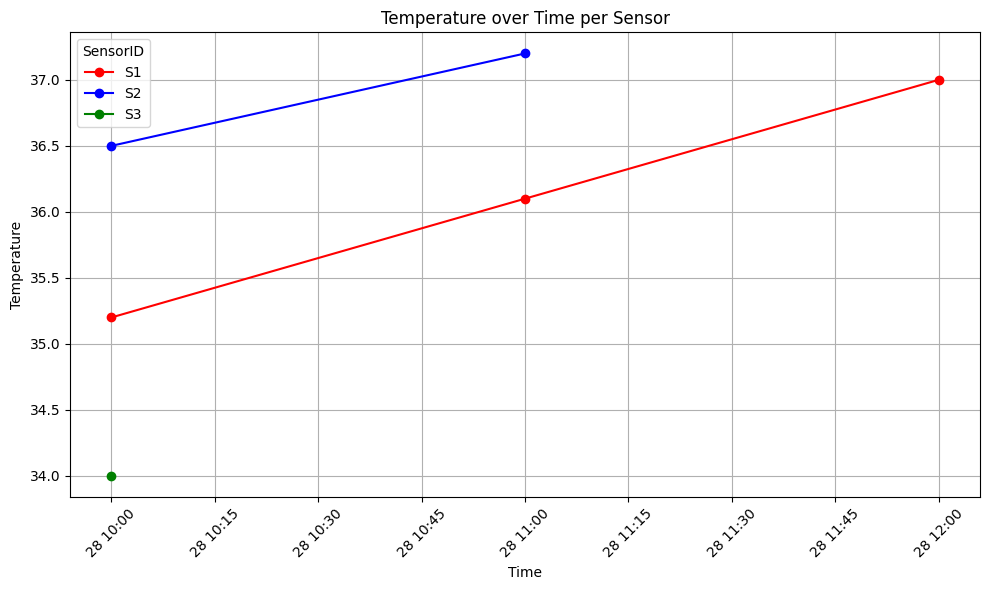

In [4]:
#Time Series Visualization
#Plot a line chart of temperature vs. time for each sensor (use different colors
plt.figure(figsize=(10, 6))
colors={"S1":"red" , "S2":"blue" , "S3":"green"}
for sensor_id,group in df.groupby("SensorID"):
    plt.plot(group["Timestamp"], group["Temperature"],
             label=sensor_id, marker='o', color=colors.get(sensor_id, "black"))
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Temperature over Time per Sensor")
plt.legend(title="SensorID")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


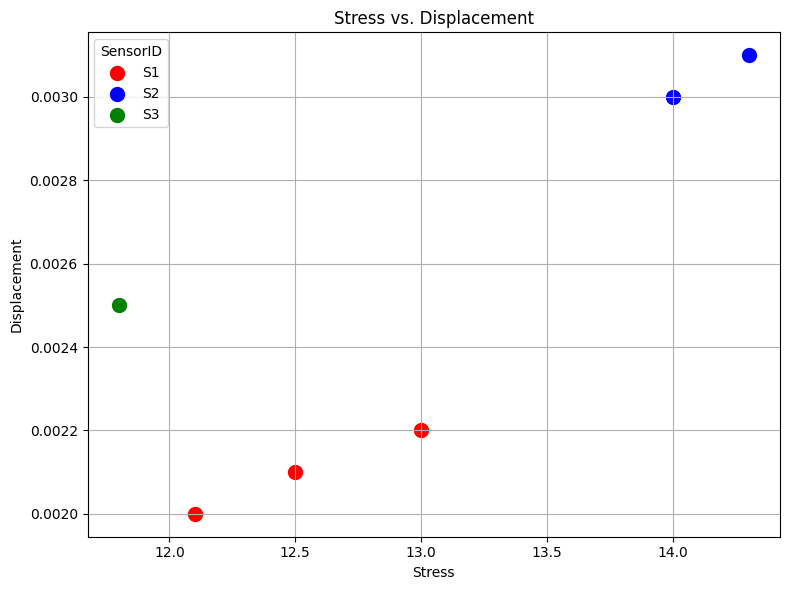

In [5]:
#Stress vs. Displacement
plt.figure(figsize=(8, 6))

for sensor_id, group in df.groupby("SensorID"):
    plt.scatter(group["Stress"], group["Displacement"],
                label=sensor_id, s=100, color=colors.get(sensor_id, "black"))

plt.xlabel("Stress")
plt.ylabel("Displacement")
plt.title("Stress vs. Displacement")
plt.legend(title="SensorID")
plt.grid(True)
plt.tight_layout()
plt.show()
